<a href="https://colab.research.google.com/github/jana0601/A_Summer-school-LMMS/blob/main/exercise_linear_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

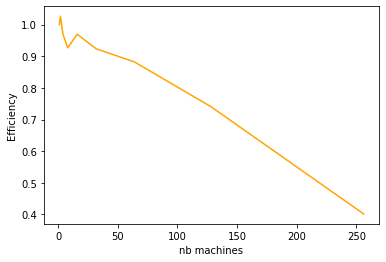

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 21 19:25:24 2021
@author: Nicole
"""

######## Exercise 1: Linear Loss in Efficiency (on average) for Ordinary Least Squares 
######## underparameterized regime 
######## simulated data

import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import KFold
import math

## input dimension 

d = 10 

## noise 

sigma = 1
sd = np.sqrt(sigma)

## squared euclidean norm norm 

def norm(x):
    """Define norm."""
    return np.sqrt(np.sum(x**2))

## number of Samples 

n=4000

## nb local nodes 

M = np.array([1,2,4,8,16,32,64,128,256])

n/M
## covariance 

eig = np.ones(d)
Sigma = np.diag(eig) 


## source  

mu = np.zeros(d)

R = 100 #parameter to set the signal-to-noise-ratio

beta = np.random.multivariate_normal(mu,(1/d)*Sigma, 1).transpose()
beta = np.reshape(beta, (d))  
beta = R*beta/norm(beta)

signal = norm(beta)


#play with SNR by increasing or decreasing R 

SNR = signal / sd   #play with SNR by increasing or decreasing R
SNR

## K: Number of repetitions of the experiment
## averaging at the end 
## you can smoothen the curve by increasing K   


K = 100

## Error

Error = np.zeros(len(M))


##### begin loops 

for _ in range(K): 
    
    X = np.random.multivariate_normal(mu,Sigma, n)#.transpose() 
    Y = X @ beta + np.random.normal(0,sd,n) 
    
    for a in range(len(M)):
        m = M[a]
        beta_loc = np.zeros(d)
        for mm in range(m):
            ind_machines = np.random.choice(n, math.floor(n/m), replace = True)
            XX = X.transpose()
            XX = X[ind_machines, :].transpose()
            YY = Y[ind_machines]
            beta_loc = beta_loc + np.linalg.pinv(XX @ XX.transpose()) @ XX @ YY
            beta_ave = beta_loc / m
        Error[a] = Error[a] + norm(beta_ave - beta)**2


####### end loops 
## averaging 
            
Error = Error / K
#Error = Error**2 #we expect a linear loss for the squared error

Efficiency = Error[0]/Error


### plots 

plt.plot(M, Efficiency, color='orange')
plt.xlabel("nb machines")
plt.ylabel("Efficiency")
plt.show()